# The link for the data set from Kaggle:
https://www.kaggle.com/datasets/ulrikthygepedersen/shipping-ecommerce

# Businees Case: Insights about the E-commerce website shipping products 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('shipping_ecommerce.csv')

# Precprocessing Data

In [3]:
data.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


Class: zero for not shipped, one for shipped 

# Basic Checks

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10998 non-null  int64 
 1   Customer_rating      10998 non-null  int64 
 2   Prior_purchases      10998 non-null  int64 
 3   Discount_offered     10998 non-null  int64 
 4   Weight_in_gms        10998 non-null  int64 
 5   Warehouse_block      10998 non-null  object
 6   Mode_of_Shipment     10998 non-null  object
 7   Product_importance   10998 non-null  object
 8   Gender               10998 non-null  object
 9   Class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB


No Null values for any columns

In [5]:
data.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
data.count()

Customer_care_calls    10998
Customer_rating        10998
Prior_purchases        10998
Discount_offered       10998
Weight_in_gms          10998
Warehouse_block        10998
Mode_of_Shipment       10998
Product_importance     10998
Gender                 10998
Class                  10998
dtype: int64

The data is consistent as the features have equal rows values

# Univariate Analysis

In [7]:
data.columns

Index(['Customer_care_calls', 'Customer_rating', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Warehouse_block',
       'Mode_of_Shipment', 'Product_importance', 'Gender', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Count'>

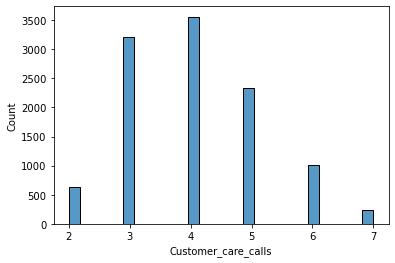

In [8]:
sns.histplot(x='Customer_care_calls',data=data)

Most of the customers need 4 calls from customer_care, maybe we have to consider that when we calculate the cost for products.
As we need Customer care department to perform a lot of calls for most of customers, which may be a higher cost for the operation.



<AxesSubplot:xlabel='Customer_rating', ylabel='Count'>

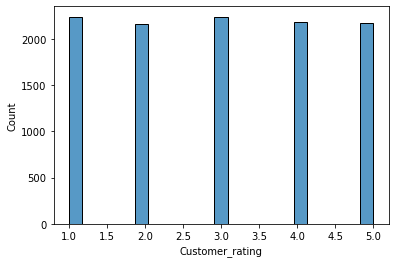

In [20]:
sns.histplot(x='Customer_rating',data=data)

Customers are almost equally distributed across different ratings

<AxesSubplot:xlabel='Prior_purchases', ylabel='Count'>

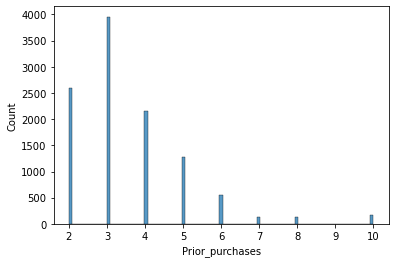

In [22]:
sns.histplot(x='Prior_purchases',data=data)

 Most of customers have at least 3 times prior_purchases, which means that no of customers who are repeating buying from the website.
maybe we have to focus on what make people buy again from the website when we figure out the relations between features to have 
better insight about the reasons behind why and why not people buy more than onetime .




<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

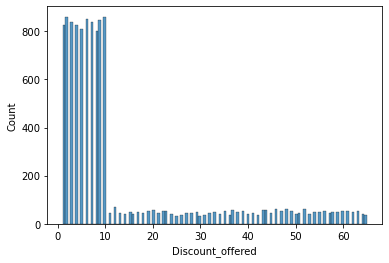

In [29]:
sns.histplot(x='Discount_offered',data=data)

 Most of customers have discount between 0 and 10 percent, could be the reason for repeated buying process.

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

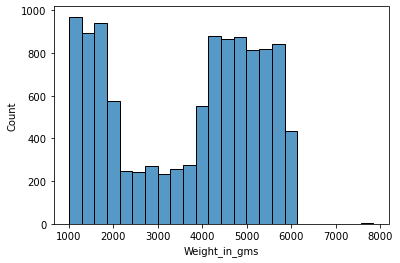

In [31]:
sns.histplot(x='Weight_in_gms',data=data)

The weight of products vary from 1000 and 2000 , and the other range is 4000 and 6000. which may affect the way we choose the shipment method, we we focus also on the relation between the shipment method, weight and the class( if shipped or not)

<AxesSubplot:xlabel='Warehouse_block', ylabel='Count'>

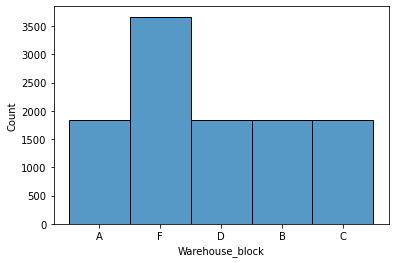

In [33]:
sns.histplot(x='Warehouse_block',data=data)

Block F is the biggest Warehouse which provides products

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Count'>

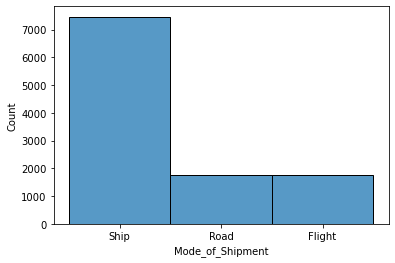

In [35]:
sns.histplot(x='Mode_of_Shipment',data=data)

 Ship is the most used shipment method in the Business, what says alot about the cost and success of shipment, we have to see the relation between shipment method and the class.

<AxesSubplot:xlabel='Product_importance', ylabel='Count'>

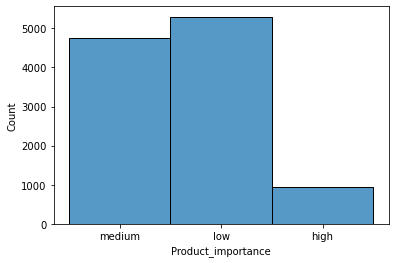

In [38]:
sns.histplot(x='Product_importance',data=data)

Medium and Low importance is the majority for the products, which may affect the shipment method, as if the product is not important maybe we ship it with low importance method.

<AxesSubplot:xlabel='Gender', ylabel='Count'>

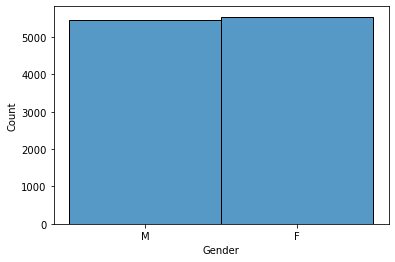

In [40]:
sns.histplot(x='Gender',data=data)

Gender is equal for all the consumers, it is not an important input for affetcing the consumption.

(array([4435.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6563.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

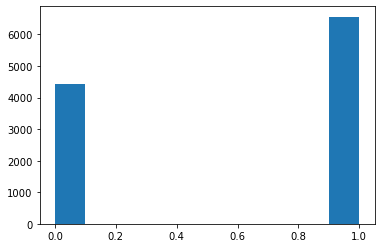

In [49]:
plt.hist(x='Class',data=data)

CLass is one(shipped) in many casses comparing to zero(not shipped), the percentage need to be better, but it is a good start

In [9]:
## Bivariate Analysis
#now we have to look at the features with each other and with the ship class( yes or no ) 

we will focus on the relation between each feature and the shipped class to have a bigger picture about the class and what could influence the results of it.

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

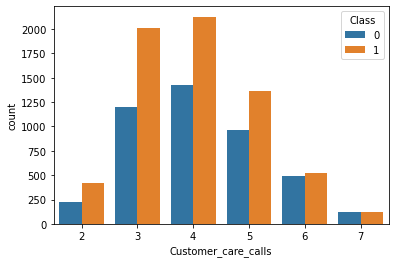

In [13]:
sns.countplot(x=data['Customer_care_calls'],hue=data['Class' ])

the more customer care the more shipment could be shipped, maybe we need to make more calls to track the shipment to make sure it is reached to the customer.

<AxesSubplot:xlabel='Customer_rating', ylabel='count'>

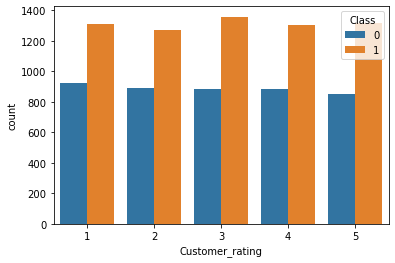

In [15]:
sns.countplot(x=data['Customer_rating'],hue=data['Class' ])

The customer rating has no influence in big way to the class of shipment as it shows in the graph

<AxesSubplot:xlabel='Prior_purchases', ylabel='count'>

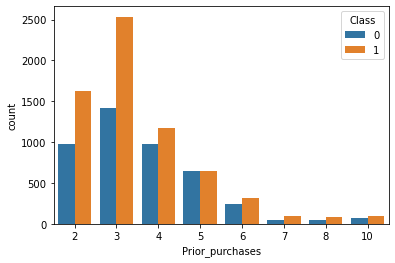

In [16]:
sns.countplot(x=data['Prior_purchases'],hue=data['Class' ])

the custmoer behavior shows that number of the customers those are repeating the purchases more than 4 times, we have to discuss this with the customer care and product team to see whay people dont like to buy again, maybe that affect also the shipment class, which leads them to not but again

<AxesSubplot:xlabel='Discount_offered', ylabel='count'>

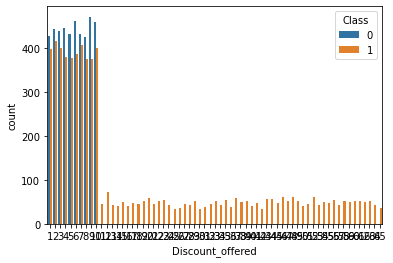

In [17]:
sns.countplot(x=data['Discount_offered'],hue=data['Class' ])

It is hard to see the difference between th discount rates, but it seems no relationship between the discount and the class of shipment

<AxesSubplot:xlabel='Weight_in_gms', ylabel='count'>

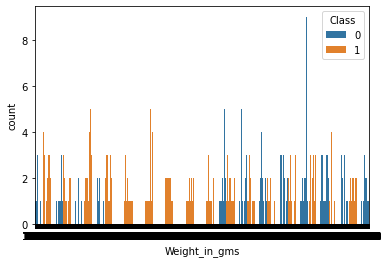

In [18]:
sns.countplot(x=data['Weight_in_gms'],hue=data['Class' ])

teh same of discount as the way of weight , there is no relationship between weight and class of shipment also

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

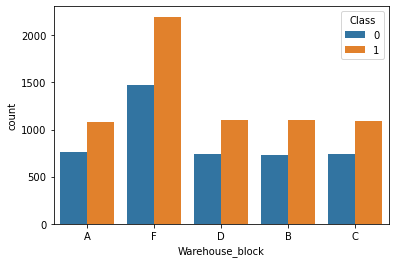

In [19]:
sns.countplot(x=data['Warehouse_block'],hue=data['Class' ])

the quantity from Block_F is successed to shipped more than any other blocks, we have to ask the important question, why this block have success rate more than other and apply the same technique in other blocks 

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

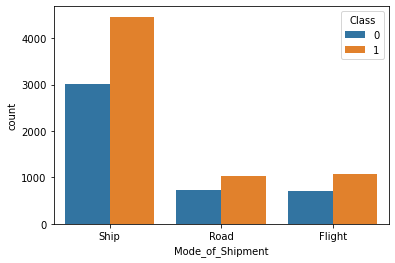

In [20]:
sns.countplot(x=data['Mode_of_Shipment'],hue=data['Class' ])

It is logic, the ships is the most used way for shipment, it carry many shipments more than plans and any vehicle of course, that is why the quantity of shipment that we use ships in it is the first way, and as usual the best way to ship 

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

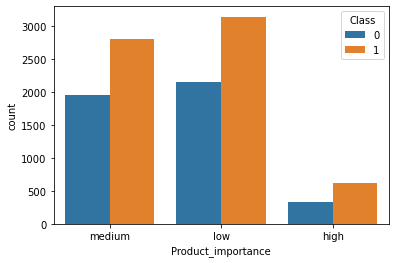

In [21]:
sns.countplot(x=data['Product_importance'],hue=data['Class' ])

it is shows that the importance of product doesnt affect the class of shipment, as the quantity of low is the largest number in products , as most of producst have low importance and the success rate also has balance distribution between all levels

# ٍStatistics activities 

In [7]:
data.columns

Index(['Customer_care_calls', 'Customer_rating', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Warehouse_block',
       'Mode_of_Shipment', 'Product_importance', 'Gender', 'Class'],
      dtype='object')

In [18]:
data.Product_importance.unique()

array(['medium', 'low', 'high'], dtype=object)

In [5]:
# get the data proportion 
data.shape[0]

10998

In [9]:
#proportion of shipped products (class=1)
len(data[data['Class']==1])/data.shape[0]

0.5967448627023095

In [10]:
#proportion of bot shipped products (class=0)
len(data[data['Class']==0])/data.shape[0]

0.40325513729769047

as we noticed when we put the Class on a chart, it seems to be close percentage between class zero and one 
we know already that the way of shipment is one of major features that affects the success of shipment or not, so we have to see what is the proportion of each way and the success of shipment

In [13]:
#1-proportion of shipping mode=ship and class=1
data[data['Mode_of_Shipment']=='Ship']['Class'].mean()

0.5976410668811152

In [14]:
#2-proportion of shipping mode='Road' and class=1
data[data['Mode_of_Shipment']=='Road']['Class'].mean()

0.5880681818181818

In [16]:
#3-proportion of shipping mode=ship and class=1
data[data['Mode_of_Shipment']=='Flight']['Class'].mean()

0.6015756893640968

it is obvious that the percentage of each way is so close, but the flight mode has success rate a little bit higher than the others, but it is neglectable
so it is not the ship mode to be the significant change for the results, but what if we get another feature in addition to the ship mode, let's see what will be the results when we put Product_importance on the same process then gather it we the mode

In [19]:
#1-proportion of Product_importance =low and class=1
data[data['Product_importance']=='low']['Class'].mean()

0.5929003021148036

In [20]:
#2-proportion of Product_importance =low and class=1
data[data['Product_importance']=='medium']['Class'].mean()

0.5904501472444258

In [21]:
#3-proportion of Product_importance =low and class=1
data[data['Product_importance']=='high']['Class'].mean()

0.6497890295358649

In [22]:
# it is predicted but we have to make sure, that the shipment importance will affect the shipment success 

to have a conclusion look, we can gather the high importance with the shipment mode to see what will be the significant change

In [28]:
#proportion of products with high importance and shipped with flight and class=1
data.query(' Mode_of_Shipment =="Flight" and Product_importance == "high" and Class==1').count()[0]/data.query(' Mode_of_Shipment =="Flight" and Product_importance == "high"').count()[0]

0.5828220858895705

In [29]:
#proportion of products with high importance and shipped with Road and class=1
data.query(' Mode_of_Shipment =="Road" and Product_importance == "high" and Class==1').count()[0]/data.query(' Mode_of_Shipment =="Road" and Product_importance == "high"').count()[0]

0.6518987341772152

In [30]:
#proportion of products with high importance and shipped with Road and class=1
data.query(' Mode_of_Shipment =="Ship" and Product_importance == "high" and Class==1').count()[0]/data.query(' Mode_of_Shipment =="Ship" and Product_importance == "high"').count()[0]

0.6666666666666666

from previous comparisons we can see that the flight mode is the least shipment mode when we carry the same products with same importance level, but shipment mode either road or ship has highr success rate 

In [31]:
#proportion of products with Low importance and shipped with flight and class=1
data.query(' Mode_of_Shipment =="Flight" and Product_importance == "low" and Class==1').count()[0]/data.query(' Mode_of_Shipment =="Flight" and Product_importance == "low"').count()[0]

0.5990453460620525

In [32]:
#proportion of products with Low importance and shipped with Road and class=1
data.query(' Mode_of_Shipment =="Road" and Product_importance == "low" and Class==1').count()[0]/data.query(' Mode_of_Shipment =="Road" and Product_importance == "low"').count()[0]

0.588098016336056

In [33]:
#proportion of products with Low importance and shipped with Road and class=1
data.query(' Mode_of_Shipment =="Ship" and Product_importance == "low" and Class==1').count()[0]/data.query(' Mode_of_Shipment =="Ship" and Product_importance == "low"').count()[0]

0.5926131630102749

# conclusion
It is now confirmed, after performing the same calculations on the low importance products, that the success rate is not related to the way of shipment as much as related to the importance of products, to be able to have more success rate on shipment, we have to perform the same way of attention of high level importance of products on all other products

# Model creation


In [ ]:
#1-Mapping the categorical data and convert it to numerical ones to be suitable for the regression modelb

In [8]:
data.Warehouse_block.unique()

array(['A', 'F', 'D', 'B', 'C'], dtype=object)

In [9]:
data.Warehouse_block=data.Warehouse_block.map({'A':0, 'F':1, 'D':2, 'B':3, 'C':4})

In [10]:
data.Warehouse_block.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
data.Mode_of_Shipment.unique()

array(['Ship', 'Road', 'Flight'], dtype=object)

In [12]:
data.Mode_of_Shipment=data.Mode_of_Shipment.map({'Ship':0, 'Road':1, 'Flight':2})

In [13]:
data.Mode_of_Shipment.unique()

array([0, 1, 2], dtype=int64)

In [14]:
data.Product_importance.unique()

array(['medium', 'low', 'high'], dtype=object)

In [15]:
data.Product_importance=data.Product_importance.map({'medium':0, 'low':1, 'high':2})

In [16]:
data.Product_importance.unique()

array([0, 1, 2], dtype=int64)

In [17]:
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [18]:
data.Gender=data.Gender.map({'M':0, 'F':1})

In [3]:
#2-data scalling 
from sklearn.preprocessing import MinMaxScaler

In [4]:
sc=MinMaxScaler()

In [7]:
data.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [19]:
data_2=['Discount_offered','Weight_in_gms']
data_3=sc.fit_transform(data.drop(data_2,axis=1))

In [21]:
data_3

array([[0.6  , 0.75 , 0.   , ..., 0.   , 0.   , 1.   ],
       [0.4  , 0.5  , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.2  , 0.75 , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.2  , 0.25 , 1.   , ..., 0.   , 0.   , 1.   ],
       [0.2  , 0.   , 0.125, ..., 0.   , 0.   , 1.   ],
       [0.4  , 0.5  , 0.125, ..., 0.   , 0.   , 1.   ]])

In [22]:
#model creation 
x=data.iloc[:,:-1]
y=data.Class

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)

In [24]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=clf.predict(x_test)

In [26]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

# Evaluation of the model

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score, classification_report, f1_score

In [28]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 634  458]
 [ 570 1088]]


In [29]:
re=recall_score(y_test,y_pred)
re

0.6562123039806996

In [30]:
pre=precision_score(y_test, y_pred)
pre

0.703751617076326

In [31]:
f1_score=f1_score(y_test,y_pred)
f1_score

0.6791510611735331

In [32]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1092
           1       0.70      0.66      0.68      1658

    accuracy                           0.63      2750
   macro avg       0.62      0.62      0.62      2750
weighted avg       0.63      0.63      0.63      2750

